Dataset=  https://www.kaggle.com/datasets/shailx/imdb-movie-rating-dataset?utm_source=chatgpt.com

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Kütüphane/Fonksiyon	Ne işe yarar?
* pandas (pd)	--> Veri dosyalarını okur, işler
* train_test_split-->	Veriyi eğitim/test olarak böler
* LinearRegression-->	Sayısal veri tahmini yapar
* mean_squared_error-->	Ortalama hata miktarını ölçer
* r2_score-->	Tahmin başarısını 0–1 arası değerlendirir

In [6]:
# 1. Veriyi oku
df = pd.read_csv("movie_metadata.csv")

In [7]:
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


Kullanılacak Sütunlar:
* Sütun Adı	Açıklama
* duration-->Filmin süresi (dakika)
* budget-->Filmin bütçesi
* gross-->Gişe hasılatı
* num_voted_users-->IMDb'de oy veren kişi sayısı
* cast_total_facebook_likes-->Oyuncu ekibinin toplam beğeni sayısı
* imdb_score-->🎯 Hedef değişken (tahmin edilecek puan)



In [8]:
print(df.columns)

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')


In [9]:
# 2. Gerekli sütunları seç
features = ['duration', 'budget', 'gross', 'num_voted_users', 'cast_total_facebook_likes']
target = 'imdb_score'
df = df[features + [target]].dropna()

In [10]:
df

,duration,budget,gross,num_voted_users,cast_total_facebook_likes,imdb_score
0,178.0,237000000.0,760505847.0,886204,4834,7.9
1,169.0,300000000.0,309404152.0,471220,48350,7.1
2,148.0,245000000.0,200074175.0,275868,11700,6.8
3,164.0,250000000.0,448130642.0,1144337,106759,8.5
5,132.0,263700000.0,73058679.0,212204,1873,6.6
...,...,...,...,...,...,...
5033,77.0,7000.0,424760.0,72639,368,7.0
5034,80.0,7000.0,70071.0,589,0,6.3
5035,81.0,7000.0,2040920.0,52055,147,6.9
5037,95.0,9000.0,4584.0,1338,690,6.4


In [11]:
# 3. Giriş (X) ve hedef (y) verilerini ayır
X = df[features] # modelin öğreneceği veriler
y = df[target] # modelin tahmin etmeye çalışacağı IMDb puanı

In [13]:
X

,duration,budget,gross,num_voted_users,cast_total_facebook_likes
0,178.0,237000000.0,760505847.0,886204,4834
1,169.0,300000000.0,309404152.0,471220,48350
2,148.0,245000000.0,200074175.0,275868,11700
3,164.0,250000000.0,448130642.0,1144337,106759
5,132.0,263700000.0,73058679.0,212204,1873
...,...,...,...,...,...
5033,77.0,7000.0,424760.0,72639,368
5034,80.0,7000.0,70071.0,589,0
5035,81.0,7000.0,2040920.0,52055,147
5037,95.0,9000.0,4584.0,1338,690


In [15]:
y

0       7.9
1       7.1
2       6.8
3       8.5
5       6.6
       ... 
5033    7.0
5034    6.3
5035    6.9
5037    6.4
5042    6.6
Name: imdb_score, Length: 3890, dtype: float64

In [16]:
# 4. Eğitim ve test setine ayır 
# Modelin %80’ini eğitim, %20’sini test için ayırıyoruz.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
X_train

,duration,budget,gross,num_voted_users,cast_total_facebook_likes
2793,93.0,8500000.0,15171475.0,19805,2777
1181,107.0,40000000.0,293501675.0,704766,17540
1255,95.0,40000000.0,37101011.0,30394,1070
180,96.0,135000000.0,83024900.0,62424,17416
289,140.0,100000000.0,97030725.0,230931,64599
...,...,...,...,...,...
1194,121.0,40000000.0,125069696.0,203963,1261
1368,133.0,35000000.0,109712885.0,146708,15106
904,89.0,53000000.0,45207112.0,21283,13390
4213,101.0,2400000.0,978908.0,4057,2306


In [31]:
 X_test

,duration,budget,gross,num_voted_users,cast_total_facebook_likes
4812,100.0,379000.0,2808000.0,4546,109
2540,113.0,16000000.0,127175354.0,288451,2985
2667,155.0,15000000.0,26384919.0,189032,3677
2797,85.0,11000000.0,12610731.0,38985,3050
326,216.0,100000000.0,77679638.0,314033,47657
...,...,...,...,...,...
4484,100.0,1200000.0,24741700.0,37785,1431
2545,100.0,15000000.0,44667095.0,190030,4606
3071,95.0,10800000.0,56729973.0,88529,5286
1029,102.0,50000000.0,28837115.0,34964,24107


In [32]:
y_train

2793    5.7
1181    8.1
1255    5.8
180     6.5
289     7.0
       ... 
1194    7.6
1368    7.7
904     5.5
4213    5.1
3637    6.7
Name: imdb_score, Length: 3112, dtype: float64

In [33]:
y_test

4812    6.3
2540    7.3
2667    7.9
2797    4.4
326     7.5
       ... 
4484    7.2
2545    8.0
3071    5.8
1029    4.8
680     6.7
Name: imdb_score, Length: 778, dtype: float64

In [34]:
# 5. Modeli oluştur
model = LinearRegression()

In [18]:
# 6. Modeli eğit
model.fit(X_train, y_train) #Modeli verilerle eğitir

LinearRegression()

In [19]:
# 7. Test setiyle tahmin yap
y_pred = model.predict(X_test) #Test verisi üzerinde IMDb puanı tahmini yapılır.

In [22]:
# 8. Performansı değerlendir
rmse = mean_squared_error(y_test, y_pred, squared=False) #Ortalama hata değeri (düşük olması iyi)
r2 = r2_score(y_test, y_pred)  #Açıklanan varyans (1'e yakınsa mükemmel)

print(f"RMSE (Hata): {rmse:.2f}")
print(f"R2 Skoru: {r2:.2f}")

RMSE (Hata): 0.88
R2 Skoru: 0.29


In [23]:
# Sonuçları bir tabloda göster
sonuclar = pd.DataFrame({
    'Gerçek IMDb Puanı': y_test.values,
    'Tahmin Edilen IMDb Puanı': y_pred
})

In [24]:
# İlk 10 tahmini yazdır
print(sonuclar.head(10).to_string(index=False)) 
# to_string(index=False): Satır numaralarını yazdırmaz, tablo gibi temiz gösterir

 Gerçek IMDb Puanı  Tahmin Edilen IMDb Puanı
               6.3                  6.139269
               7.3                  6.970756
               7.9                  7.297078
               4.4                  6.074334
               7.5                  8.217331
               6.2                  5.928580
               7.5                  6.316709
               6.3                  6.562609
               8.9                 11.243815
               5.2                  6.117804


In [25]:
import matplotlib.pyplot as plt #Python’un en temel grafik çizim kütüphanesi
import seaborn as sns #Daha estetik ve modern grafikler için geliştirilmiş bir kütüphane

# Scatter Plot: Gerçek vs. Tahmin Edilen IMDb Puanları

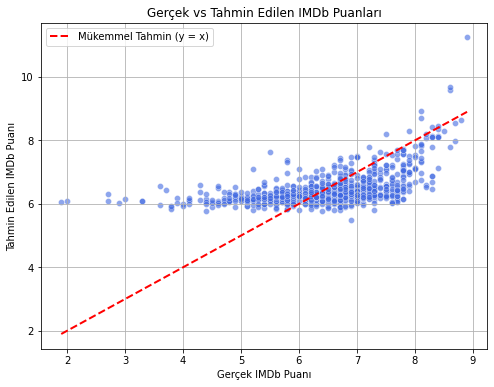

In [26]:
plt.figure(figsize=(8, 6))  # Grafik boyutunu ayarla
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color="royalblue")

plt.xlabel("Gerçek IMDb Puanı")       # X ekseni etiketi
plt.ylabel("Tahmin Edilen IMDb Puanı")  # Y ekseni etiketi
plt.title("Gerçek vs Tahmin Edilen IMDb Puanları")  # Başlık

# Gerçek = Tahmin olanları gösteren eğik kırmızı çizgi
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', linewidth=2, label="Mükemmel Tahmin (y = x)")

plt.legend()
plt.grid(True)
plt.show()


figsize=(8, 6) → Genişliği 8, yüksekliği 6 birim olan bir grafik alanı.
*****************************

sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color="royalblue")
📍 Noktaları çizer:

x=y_test: X ekseni → Gerçek IMDb puanları

y=y_pred: Y ekseni → Modelin tahmin ettiği puanlar

alpha=0.6: Saydamlık (noktalar şeffaf, üst üste gelirse bile görülebilir)

color="royalblue": Noktaların rengi
**************************************

plt.xlabel("Gerçek IMDb Puanı")
📝 X ekseninin başlığı:
Kullanıcıya neye baktığını açıklar → Gerçek (doğru) IMDb skorları
*****************************

plt.ylabel("Tahmin Edilen IMDb Puanı")
📝 Y ekseninin başlığı:
Modelin tahmin ettiği IMDb puanları
***************************

plt.title("Gerçek vs Tahmin Edilen IMDb Puanları")
📌 Grafiğin üst kısmına bir başlık koyar.
Yani bu grafik neyi gösteriyor? Gerçek ve tahmin karşılaştırmasını.
************************

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2, label="Mükemmel Tahmin (y = x)")
 Kırmızı, kesikli bir çizgi çizer:

Başlangıç ve bitiş noktaları: (min, min) → (max, max)

Yani bu çizgi y = x doğrusudur → Gerçek = Tahmin olan durumları temsil eder

'r--': Kırmızı (r), kesikli çizgi (--)

linewidth=2: Çizgi kalınlığı

label=...: Açıklaması efsane (legend) kutusunda yazacak

 Noktalar bu çizgiye ne kadar yakınsa, model o kadar iyi tahmin yapmıştır.
 **********************************

plt.legend()
Grafiğin sağ üst köşesine “Mükemmel Tahmin (y = x)” yazan bir kutu (legend) ekler.
Neyi neyin temsil ettiğini anlatır.

plt.grid(True)
Arka plana ızgara çizgileri ekler → değer okumayı kolaylaştırır

plt.show()
Tüm grafik çizim komutlarını uygular ve grafik penceresini gösterir.
***************************************

🧠 BU GRAFİKTEN NE ANLARIZ?
Noktalar kırmızı çizgiye yakınsa: ✔️ Model çok iyi tahmin etmiş

Noktalar dağınıksa, çizgiden uzaksa: ❌ Modelin hataları büyük

Çizginin hep üstünde ya da altında toplanıyorsa: Model sistematik hata yapıyor olabilir

# Histogram: Tahmin Hatalarının Dağılımı

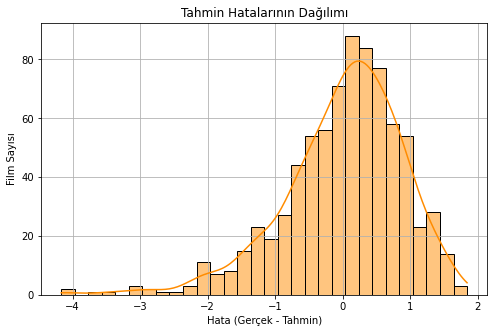

In [27]:
hatalar = y_test - y_pred  # Her film için gerçek - tahmin farkı

plt.figure(figsize=(8, 5))
sns.histplot(hatalar, bins=30, kde=True, color="darkorange")

plt.title("Tahmin Hatalarının Dağılımı")
plt.xlabel("Hata (Gerçek - Tahmin)")
plt.ylabel("Film Sayısı")
plt.grid(True)
plt.show()


hatalar = y_test - y_pred
y_test: Gerçek IMDb puanları

y_pred: Modelin tahmin ettiği IMDb puanları

Bu işlem her film için “gerçek puan - tahmin puanı” farkını hesaplar

Sonuç: Pozitif → model düşük tahmin etmiş, Negatif → model yüksek tahmin etmiş
*****************************************

plt.figure(figsize=(8, 5))
Grafik çizimi için boş bir alan oluşturur

figsize: Genişlik = 8 birim, yükseklik = 5 birim
**************************************************

sns.histplot(hatalar, bins=30, kde=True, color="darkorange")
sns.histplot(...): Seaborn ile histogram çizimi

hatalar: X eksenine bu farkları (sapmaları) koyar

bins=30: Grafiği 30 eşit aralıklı kutuya böler

kde=True: Histogramın üstüne dağılım eğrisi (smooth line) ekler

color="darkorange": Renk tercihi (estetik amaçlı)
***********************************

plt.title("Tahmin Hatalarının Dağılımı")
---> Grafiğin üst kısmındaki başlık
***************************

🔹 plt.xlabel("Hata (Gerçek - Tahmin)")
X ekseni: Tahmin sapması (pozitif ya da negatif)

🔹 plt.ylabel("Film Sayısı")
Y ekseni: O hata değerine sahip kaç film var?

🔹 plt.grid(True)
Arka plana kılavuz çizgileri ekler (okunabilirliği artırır)

🔹 plt.show()
Tüm yukarıdaki komutları birleştirerek grafiği ekrana çizer

# Bonus: R² ve RMSE Bilgisiyle Grafik Üzerine Yazmak

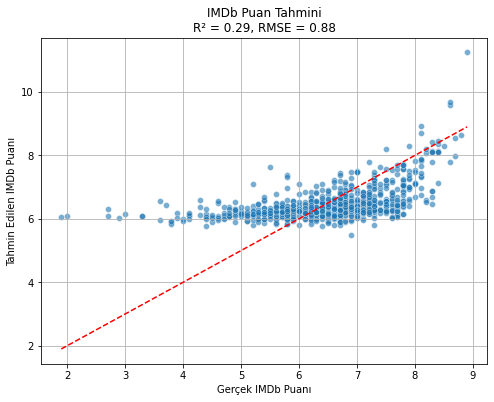

In [28]:
from sklearn.metrics import mean_squared_error, r2_score

rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)

plt.xlabel("Gerçek IMDb Puanı")
plt.ylabel("Tahmin Edilen IMDb Puanı")
plt.title(f"IMDb Puan Tahmini\nR² = {r2:.2f}, RMSE = {rmse:.2f}")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

plt.grid(True)
plt.show()


from sklearn.metrics import mean_squared_error, r2_score
📦 Gerekli metrik fonksiyonları içe aktar:

mean_squared_error: Tahmin ile gerçek değerler arasındaki kareli fark ortalamasını verir (RMSE için kullanılır)

r2_score: R² metrik değeri, modelin başarı oranını gösterir (1.00 → mükemmel)
***********************************

rmse = mean_squared_error(y_test, y_pred, squared=False)
📐 RMSE değeri hesaplanır:

y_test: Gerçek IMDb puanları

y_pred: Tahmin edilen IMDb puanları

squared=False: Bu parametre sayesinde RMSE (karekök alınmış hata) döner

Düşükse iyi, yüksekse kötü
************************

r2 = r2_score(y_test, y_pred)
📈 R² (determinasyon katsayısı) hesaplanır:

0.0 ile 1.0 arasında değişir

Ne kadar 1'e yakınsa model o kadar başarılıdır

r2 = 1.0: Model tüm veriyi mükemmel tahmin ediyor
*******************************

plt.figure(figsize=(8, 6))
📊 Yeni bir grafik alanı başlatır:

figsize=(8, 6): 8 birim genişlik, 6 birim yükseklik
******************************

sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
🔹 Dağılım grafiğini çizer:

X ekseni → Gerçek IMDb puanları

Y ekseni → Modelin tahmin ettiği IMDb puanları

alpha=0.6: Noktalar yarı saydam — üst üste gelince fark edilebilir
*****************************

plt.xlabel("Gerçek IMDb Puanı")
X eksenine açıklama eklenir

plt.ylabel("Tahmin Edilen IMDb Puanı")
Y eksenine açıklama eklenir
*********************



plt.title(f"IMDb Puan Tahmini\nR² = {r2:.2f}, RMSE = {rmse:.2f}")
🎯 Grafiğin üst kısmına hem başlık hem de model değerlendirme sonuçları yazdırılır:

f"...": f-string ile içine r2 ve rmse değişkenleri yerleştirilir

:.2f: Sayıları virgülden sonra 2 basamakla yuvarla

\n: Alt satıra geç (başlık + skorlar)
*************************

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
📐 “Mükemmel tahmin” çizgisi:

Gerçek puanlar ile tahmin puanları tamamen eşleşseydi bu çizgide olurdu

y = x çizgisidir

'r--': Kırmızı (r), kesikli (--) çizgi
*************************

* plt.grid(True)
Arka planda ızgara çizgileri görünür → Değerleri daha rahat okumak için

* plt.show()
Grafik penceresini ekrana bastırır (çizimi tamamlar)